Imports

In [83]:
import os
import inspect
from translation import FJSSPInstancesTranslator, SequenceGAEncoder
from model import Order, ProductionEnvironment
import matplotlib.pyplot as plt

Setup

In [84]:
def read_file(source : str, id : int, path : str) -> list[str]:
    if source.startswith('0'):
        target_file = f'Behnke{id}.fjs'
    elif source.startswith('1'):
        target_file = f'BrandimarteMk{id}.fjs'
    elif source.startswith('2a'):
        target_file = f'HurinkSdata{id}.fjs'
    elif source.startswith('2b'):
        target_file = f'HurinkEdata{id}.fjs'
    elif source.startswith('2c'):
        target_file = f'HurinkRdata{id}.fjs'
    elif source.startswith('2d'):
        target_file = f'HurinkVdata{id}.fjs'
    elif source.startswith('3'):
        target_file = f'DPpaulli{id}.fjs'
    elif source.startswith('4'):
        target_file = f'ChambersBarnes{id}.fjs'
    elif source.startswith('5'):
        target_file = f'Kacem{id}.fjs'
    elif source.startswith('6'):
        target_file = f'Fattahi{id}.fjs'
    path += f'{source}\\{target_file}'
    file = open(path, 'r')
    return file.readlines()

In [85]:
def get_max_dissimilarity(available_workstations, operations):
    return len(operations) + sum([len(x) for x in available_workstations])

def get_approximate_max_dissimilarity(n_jobs, jobs, avg_machines):
    return sum([int(j.split(' ')[0]) for j in jobs]) + sum([int(j.split(' ')[0]) * float(avg_machines) for j in jobs])

Load Data

In [86]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
read_path = 'C:/Users/huda/Documents/GitHub/scheduling_model/code/external_test_data/FJSSPinstances/'

sources = ['0_BehnkeGeiger', '1_Brandimarte', '2a_Hurink_sdata', '2b_Hurink_edata', '2c_Hurink_rdata', '2d_Hurink_vdata', '3_DPpaulli', '4_ChambersBarnes', '5_Kacem', '6_Fattahi']

scores = []
source_scores = []
for benchmark_source in sources:
    full_path = read_path + benchmark_source + '/'
    source_scores.append([])
    for i in range(len(os.listdir(full_path))):
        file_content : list[str] = read_file(benchmark_source, i+1, read_path)
        values = file_content[0].split(' ')
        workstation_amount = int(values[1])
        average_workstations = float(values[2])
        n_operations = sum([int(x.split(' ')[0]) for x in file_content[1:]])
        max_dissimilarity = get_approximate_max_dissimilarity(values[0], file_content[1:], values[2])

        scores.append([f'{benchmark_source}{i+1}', average_workstations/workstation_amount, values[0], values[1], values[2], max_dissimilarity, n_operations, average_workstations])
        source_scores[-1].append(scores[-1])


Analysis

In [87]:
beta = [x[1] for x in scores]
approx_max_dissimilarity = [x[5] for x in scores]
n_jobs = [int(x[2]) for x in scores]
n_machines = [int(x[3]) for x in scores]
n_operations = [x[6] for x in scores]

Text(0.5, 1.0, 'Beta-Values and Approximate Maximum Dissimilarity Scores')

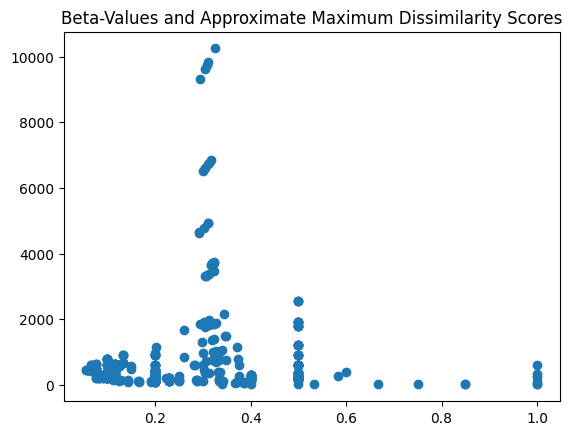

In [88]:
plt.scatter(beta, approx_max_dissimilarity)
plt.xlabel = 'Beta_Values'
plt.ylabel = 'Approx. Max Dissimilarity'
plt.title('Beta-Values and Approximate Maximum Dissimilarity Scores')

Text(0.5, 1.0, 'Number of jobs and Number of machines')

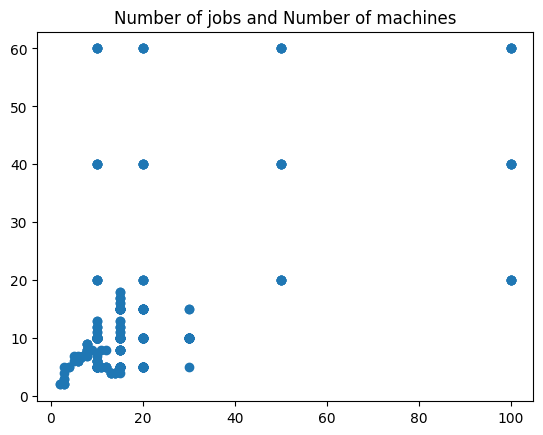

In [89]:
plt.scatter(n_jobs, n_machines)
plt.xlabel = 'n_jobs'
plt.ylabel = 'n_machines'
plt.title('Number of jobs and Number of machines')

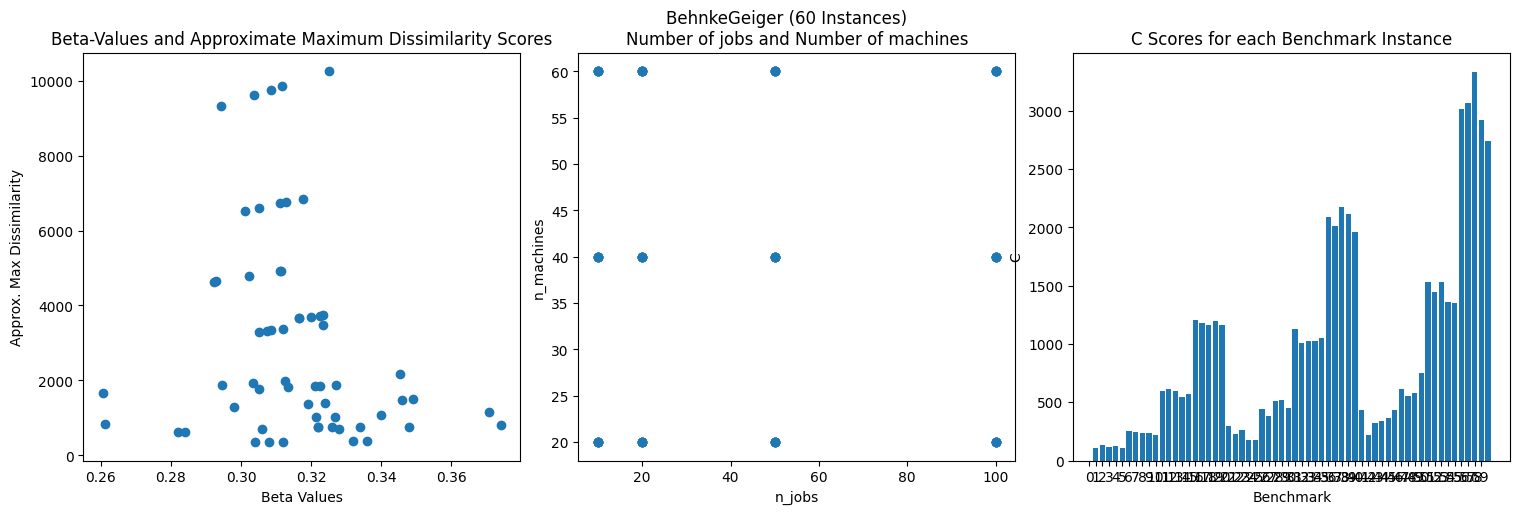

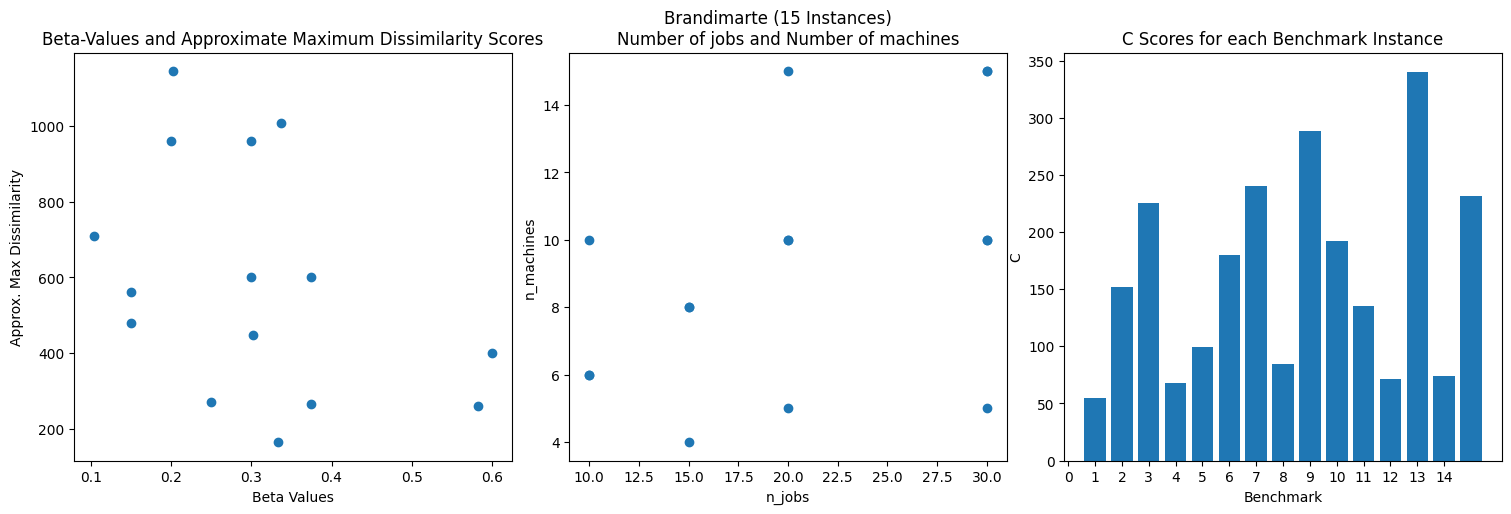

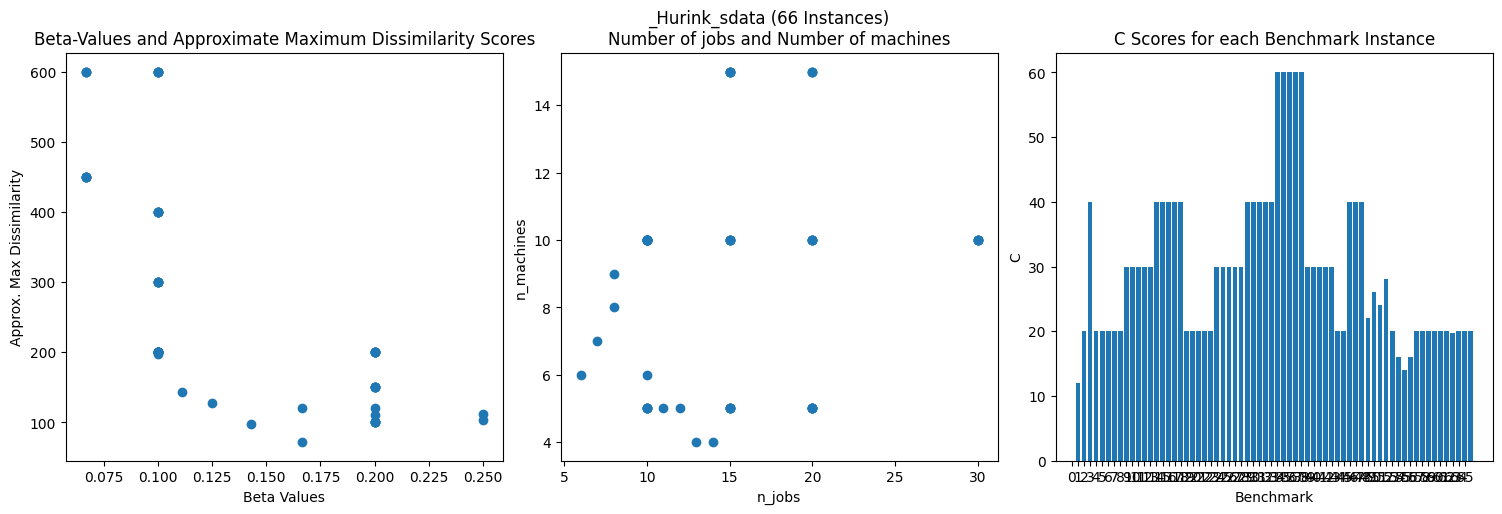

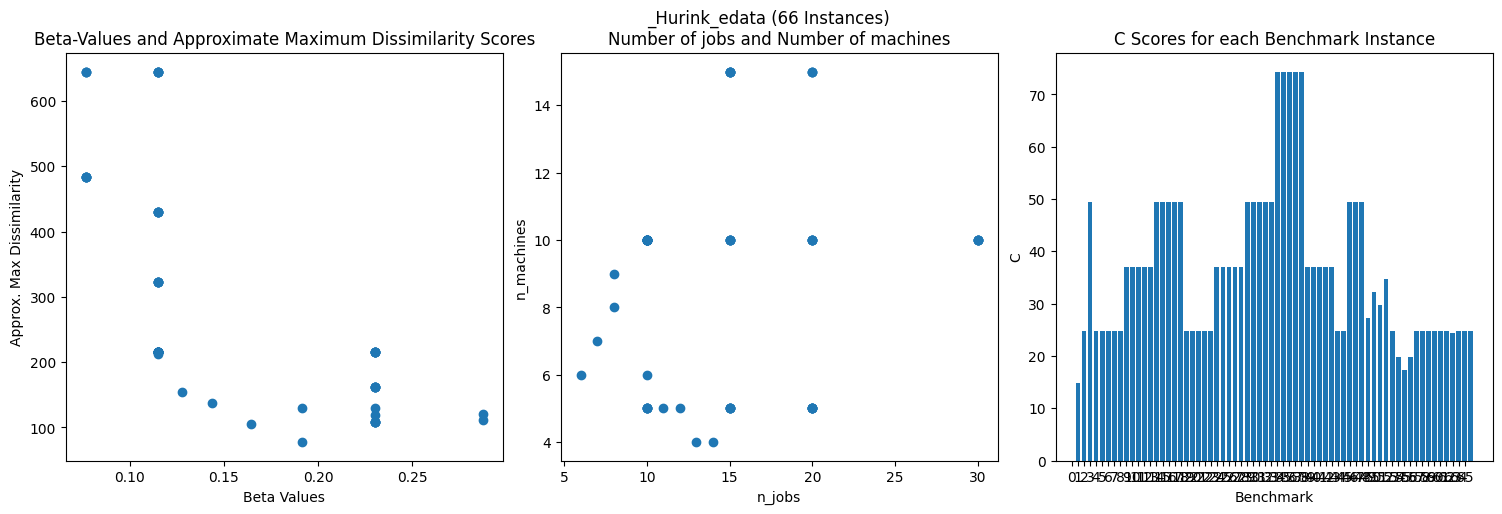

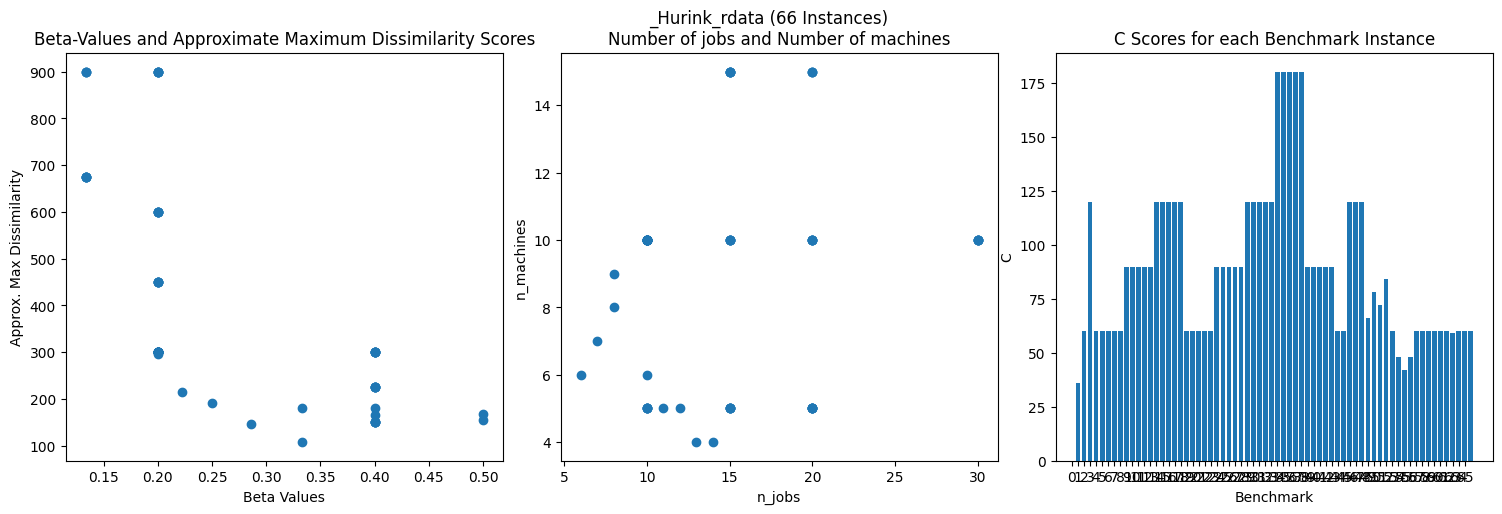

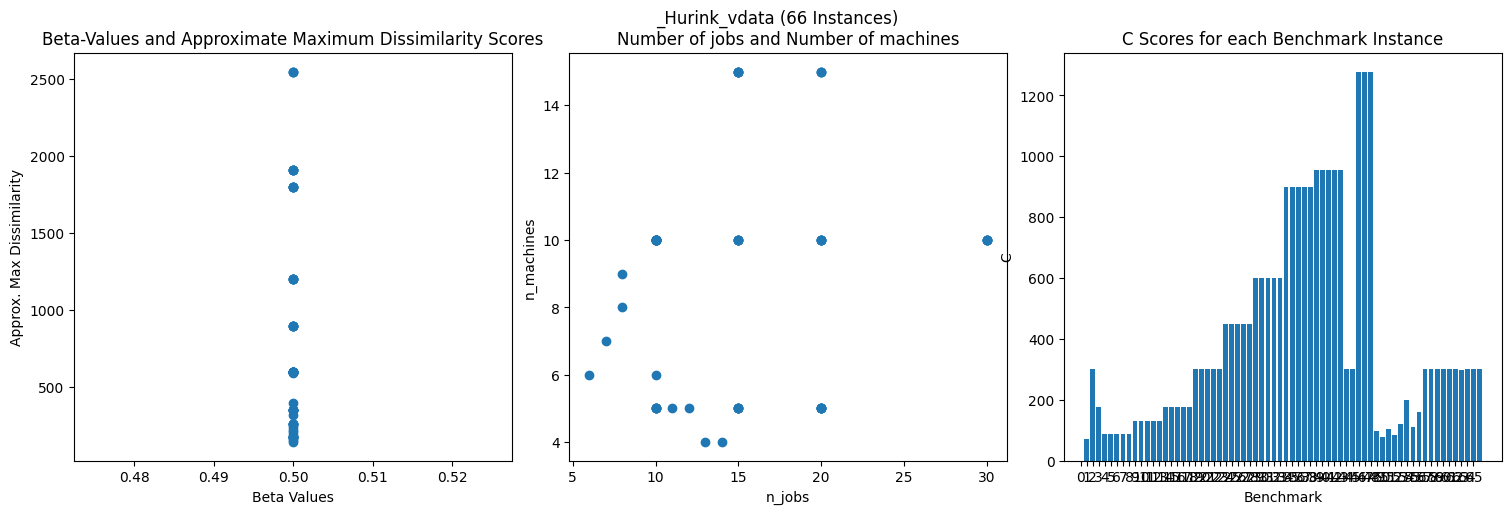

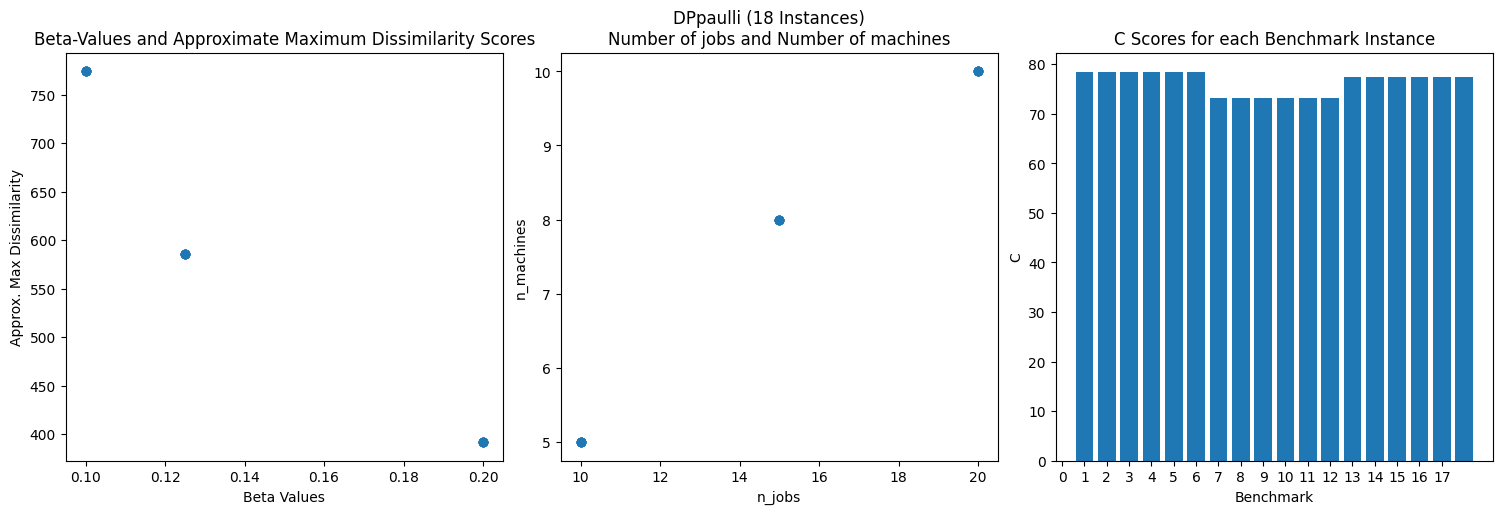

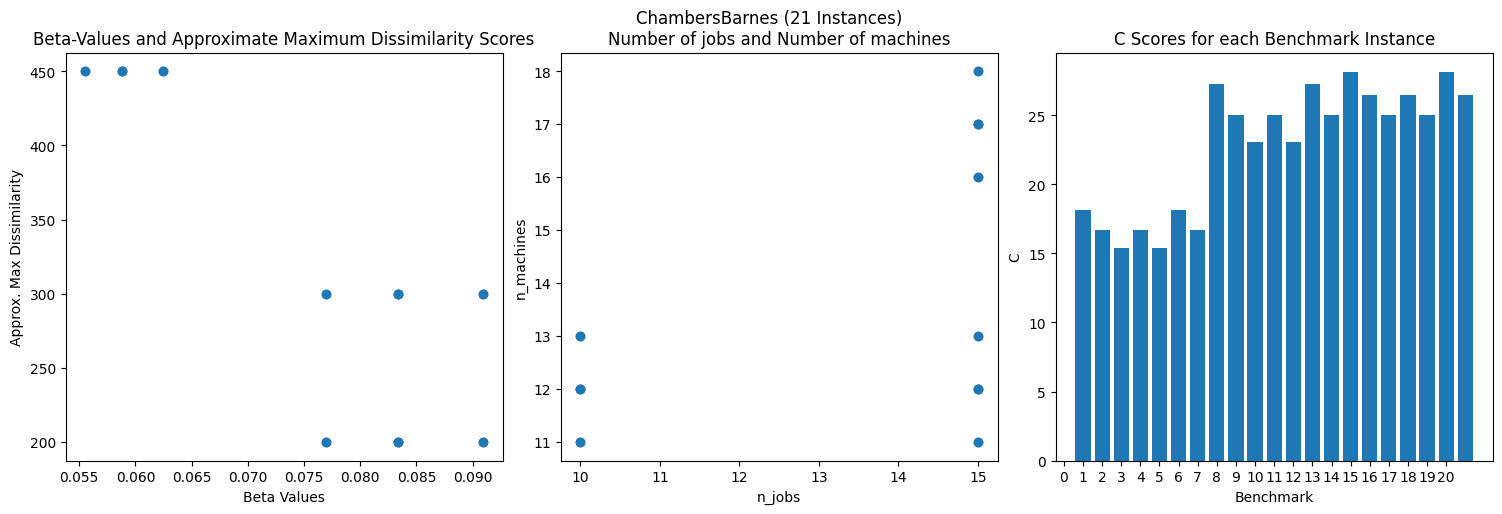

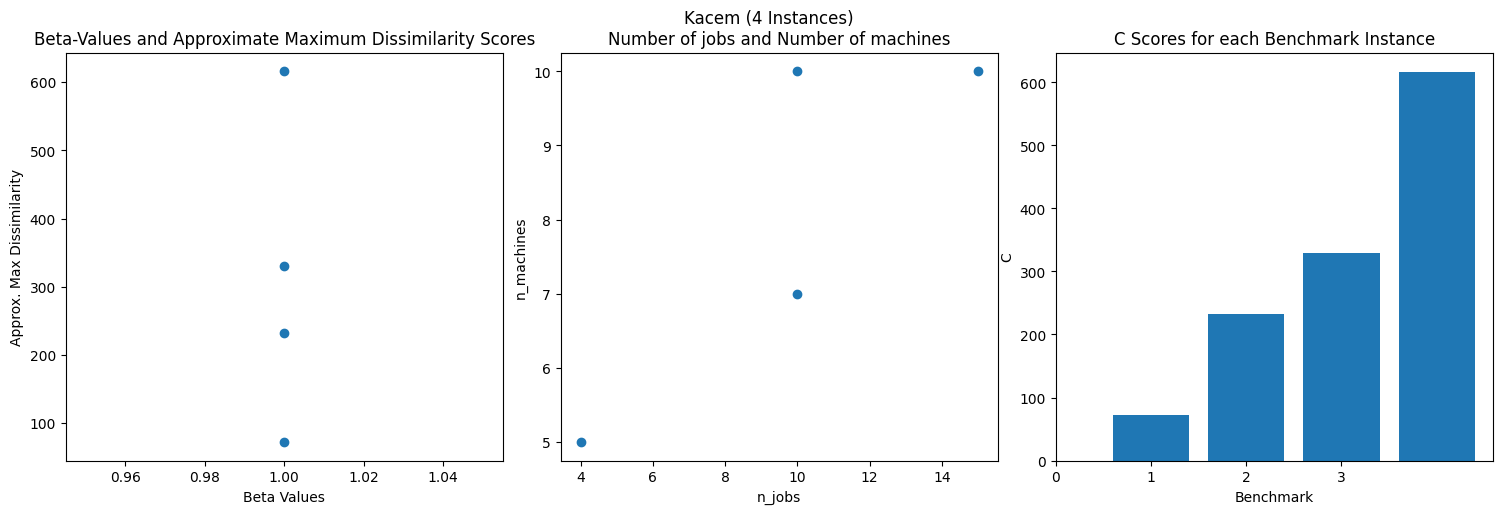

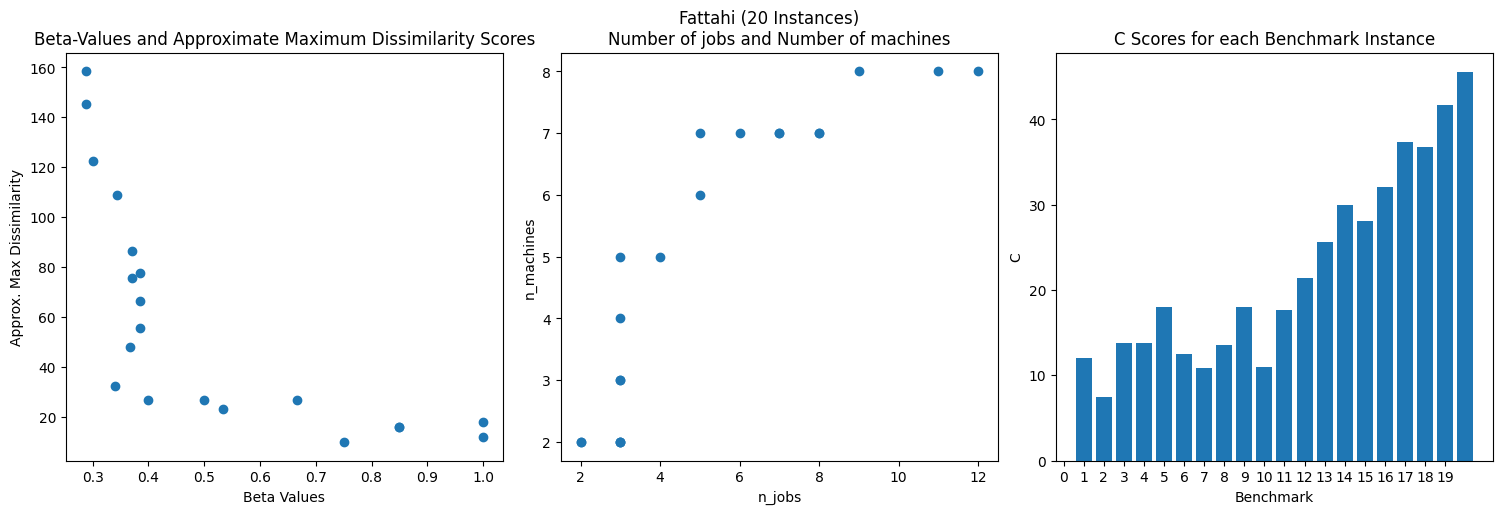

In [90]:
for i in range(len(source_scores)):
    beta = [x[1] for x in source_scores[i]]
    approx_max_dissimilarity = [x[5] for x in source_scores[i]]
    n_jobs = [int(x[2]) for x in source_scores[i]]
    n_machines = [int(x[3]) for x in source_scores[i]]
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle(f'{source_scores[i][0][0][2:-1]} ({len(source_scores[i])} Instances)')
    fig.tight_layout()
    ax1, ax2, ax3 = axs
    ax1.scatter(beta, approx_max_dissimilarity)
    ax1.set_xlabel('Beta Values')
    ax1.set_ylabel('Approx. Max Dissimilarity')
    ax1.set_title('Beta-Values and Approximate Maximum Dissimilarity Scores')

    ax2.scatter(n_jobs, n_machines)
    ax2.set_xlabel('n_jobs')
    ax2.set_ylabel('n_machines')
    ax2.set_title('Number of jobs and Number of machines')

    c = [b * d for b,d in zip([x[1] for x in source_scores[i]], [y[5] for y in source_scores[i]])]
    ax3.bar([i+1 for i in range(len(source_scores[i]))], c)
    ax3.set_xlabel('Benchmark')
    ax3.set_ylabel('C')
    ax3.set_title('C Scores for each Benchmark Instance')
    ax3.set_xticks(range(len(source_scores[i])))
    plt.show()

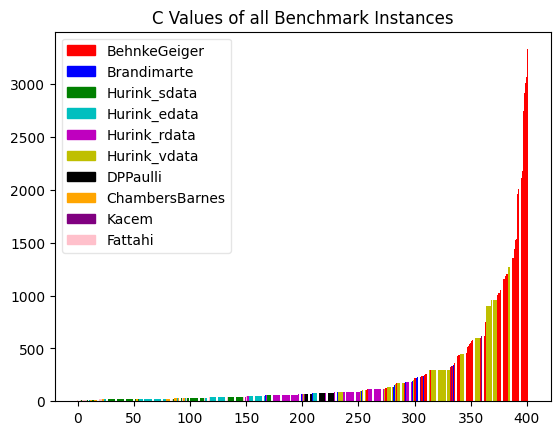

In [91]:
#from matplotlib import colors as mcolors
all_bars = []
count = 0
#colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
source_colors= ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
colors = []

for i in range(len(source_scores)):
    all_bars.extend([b * d for b,d in zip([x[1] for x in source_scores[i]], [y[5] for y in source_scores[i]])])
    colors.extend([source_colors[i]] * len(source_scores[i]))
    count += len(source_scores[i])

sorted = list(zip(all_bars, colors))
sorted.sort(key=lambda x: x[0])
sorted_values = [x[0] for x in sorted]
sorted_colors = [x[1] for x in sorted]

# sources = ['0_BehnkeGeiger', '1_Brandimarte', '2a_Hurink_sdata', '2b_Hurink_edata', '2c_Hurink_rdata', '2d_Hurink_vdata', '3_DPpaulli', '4_ChambersBarnes', '5_Kacem', '6_Fattahi']
import matplotlib.patches as mpatches
b1 = mpatches.Patch(color='r', label='BehnkeGeiger')
b2 = mpatches.Patch(color='b', label='Brandimarte')
b3 = mpatches.Patch(color='g', label='Hurink_sdata')
b4 = mpatches.Patch(color='c', label='Hurink_edata')
b5 = mpatches.Patch(color='m', label='Hurink_rdata')
b6 = mpatches.Patch(color='y', label='Hurink_vdata')
b7 = mpatches.Patch(color='k', label='DPPaulli')
b8 = mpatches.Patch(color='orange', label='ChambersBarnes')
b9 = mpatches.Patch(color='purple', label='Kacem')
b10 = mpatches.Patch(color='pink', label='Fattahi')

plt.legend(handles=[b1, b2, b3, b4, b5, b6, b7, b8, b9, b10], loc='upper left', framealpha=0.5, frameon=True)

plt.title('C Values of all Benchmark Instances')
plt.bar(range(count), sorted_values, color=sorted_colors)
plt.show()

In [92]:
beta = [x[1] for x in scores]
approx_max_dissimilarity = [x[5] for x in scores]
n_jobs = [int(x[2]) for x in scores]
n_machines = [int(x[3]) for x in scores]
average_workstations = [x[7] for x in scores]
n_operations = [x[6] for x in scores]
c_values = [b * d for b,d in zip([x[1] for x in scores], [y[5] for y in scores])]


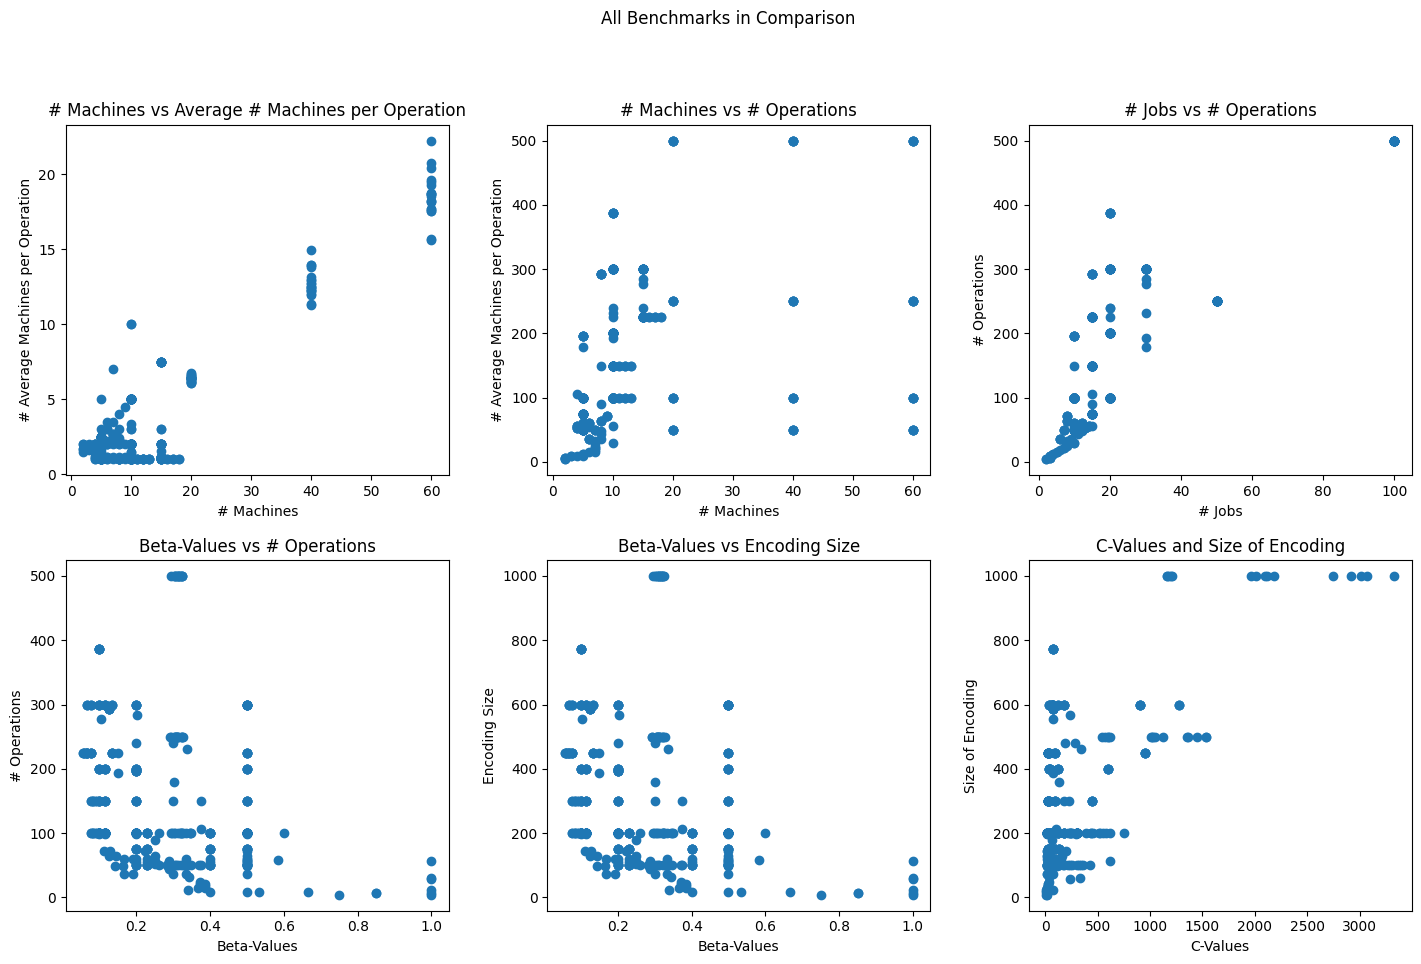

In [93]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
fig.suptitle(f'All Benchmarks in Comparison')
fig.tight_layout(pad=4)
ax1, ax2, ax3 = axs[0] # row 1
ax4, ax5, ax6 = axs[1] # row 2
ax1.set_title('# Machines vs Average # Machines per Operation')
ax1.scatter(n_machines, average_workstations)
ax1.set_xlabel('# Machines')
ax1.set_ylabel('# Average Machines per Operation')
ax2.set_title('# Machines vs # Operations')
ax2.scatter(n_machines, n_operations)
ax2.set_xlabel('# Machines')
ax2.set_ylabel('# Average Machines per Operation')
ax3.set_title('# Jobs vs # Operations')
ax3.scatter(n_jobs, n_operations)
ax3.set_xlabel('# Jobs')
ax3.set_ylabel('# Operations')
ax4.set_title('Beta-Values vs # Operations')
ax4.scatter(beta, n_operations)
ax4.set_xlabel('Beta-Values')
ax4.set_ylabel('# Operations')
ax5.set_title('Beta-Values vs Encoding Size')
ax5.scatter(beta, [o * 2 for o in n_operations]) # encoding size
ax5.set_xlabel('Beta-Values')
ax5.set_ylabel('Encoding Size')
ax6.set_title('C-Values and Size of Encoding')
ax6.set_xlabel('C-Values')
ax6.set_ylabel('Encoding Size')
ax6.scatter(c_values, [o * 2 for o in n_operations])

Text(0.5, 0.92, 'C-Values, Number of Operations and Number of Machines')

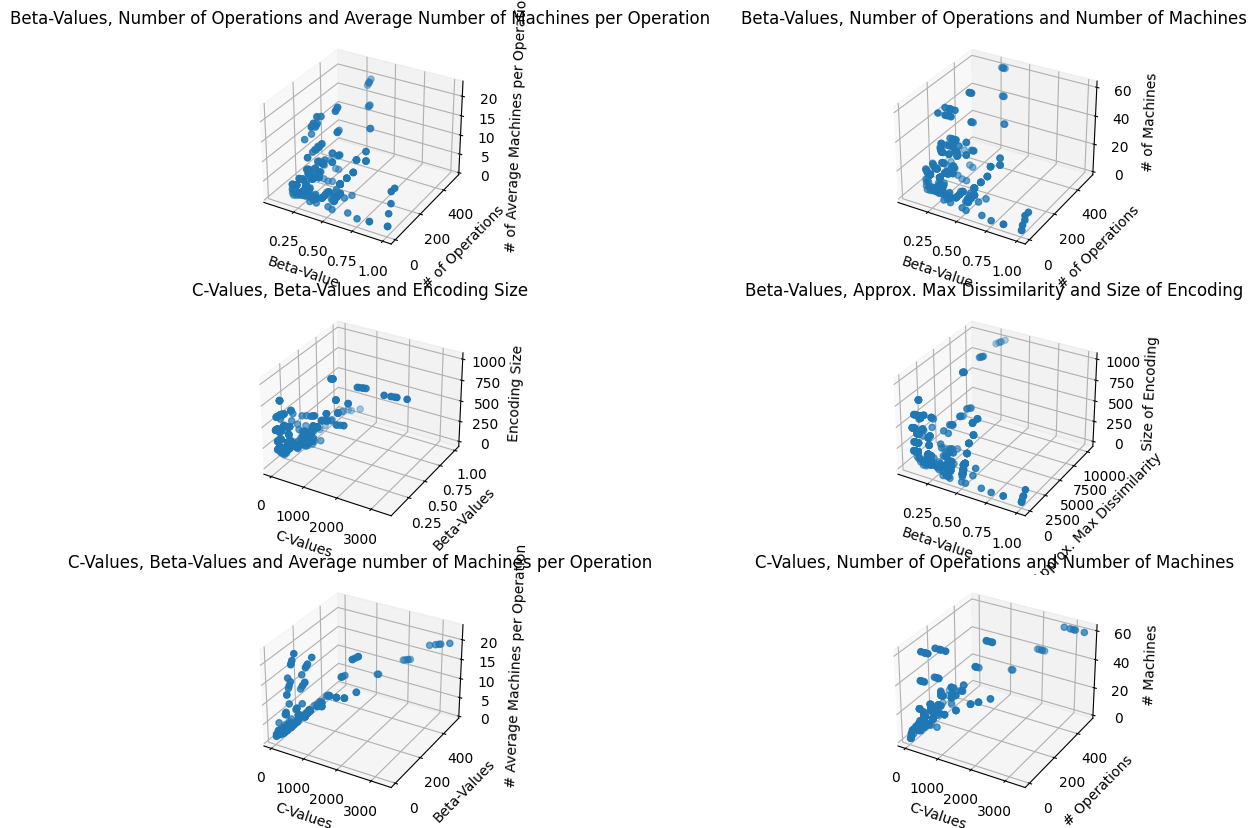

In [112]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3, 2, 1, projection='3d')
ax1.scatter(beta, [o for o in n_operations], [avg_m for avg_m in average_workstations])
ax1.set_xlabel('Beta-Value')
ax1.set_ylabel('# of Operations')
ax1.set_zlabel('# of Average Machines per Operation')
ax1.set_title('Beta-Values, Number of Operations and Average Number of Machines per Operation')

ax2 = fig.add_subplot(3, 2, 2, projection='3d')
ax2.scatter(beta, [o for o in n_operations], [m for m in n_machines])
ax2.set_xlabel('Beta-Value')
ax2.set_ylabel('# of Operations')
ax2.set_zlabel('# of Machines')
ax2.set_title('Beta-Values, Number of Operations and Number of Machines')

ax3 = fig.add_subplot(3, 2, 3, projection='3d')
ax3.scatter(c_values, beta, [o * 2 for o in n_operations])
ax3.set_xlabel('C-Values')
ax3.set_ylabel('Beta-Values')
ax3.set_zlabel('Encoding Size')
ax3.set_title('C-Values, Beta-Values and Encoding Size')

ax4 = fig.add_subplot(3, 2, 4, projection='3d')
ax4.scatter(beta, approx_max_dissimilarity, [o * 2 for o in n_operations])
ax4.set_xlabel('Beta-Value')
ax4.set_ylabel('Approx. Max Dissimilarity')
ax4.set_zlabel('Size of Encoding')
ax4.set_title('Beta-Values, Approx. Max Dissimilarity and Size of Encoding')

ax5 = fig.add_subplot(3, 2, 5, projection='3d')
ax5.scatter(c_values, n_operations, average_workstations)
ax5.set_xlabel('C-Values')
ax5.set_ylabel('Beta-Values')
ax5.set_zlabel('# Average Machines per Operation')
ax5.set_title('C-Values, Beta-Values and Average number of Machines per Operation')

ax6 = fig.add_subplot(3, 2, 6, projection='3d')
ax6.scatter(c_values, n_operations, n_machines)
ax6.set_xlabel('C-Values')
ax6.set_ylabel('# Operations')
ax6.set_zlabel('# Machines')
ax6.set_title('C-Values, Number of Operations and Number of Machines')

In [114]:
c_values_normed_max = [float(i)/max(c_values) for i in c_values]
c_values_normed_sum = [float(i)/sum(c_values) for i in c_values]
dissimilarity_normed_max = [float(i)/max(approx_max_dissimilarity) for i in approx_max_dissimilarity]
dissimilarity_normed_sum = [float(i)/sum(approx_max_dissimilarity) for i in approx_max_dissimilarity]

[0.03230499061913696, 0.03893313320825516, 0.03390439024390243, 0.03807099437148217, 0.03309988742964353, 0.07700172607879921, 0.07359159474671671, 0.07191534709193247, 0.07191534709193247, 0.06540247654784243, 0.17874821763602242, 0.18503414634146353, 0.1803095684803002, 0.1625140712945591, 0.17104277673545956, 0.3627084427767349, 0.355422138836773, 0.3482093808630399, 0.3606191369606004, 0.3482093808630399, 0.0895915947467167, 0.06951384615384616, 0.07793110694183865, 0.0519768855534709, 0.052686529080675414, 0.13176555347091928, 0.11557703564727954, 0.1541355347091933, 0.15672915572232643, 0.1357760600375234, 0.33792664165103214, 0.3026155722326456, 0.3069230769230769, 0.3088472795497184, 0.3156292682926832, 0.6283395872420263, 0.6042776735459662, 0.6538615384615395, 0.6341842401500949, 0.5891242026266407, 0.12929520950594123, 0.06542649155722324, 0.09781073170731708, 0.10100312695434648, 0.10920825515947466, 0.13020617886178865, 0.18546471544715445, 0.16523447154471552, 0.174829268

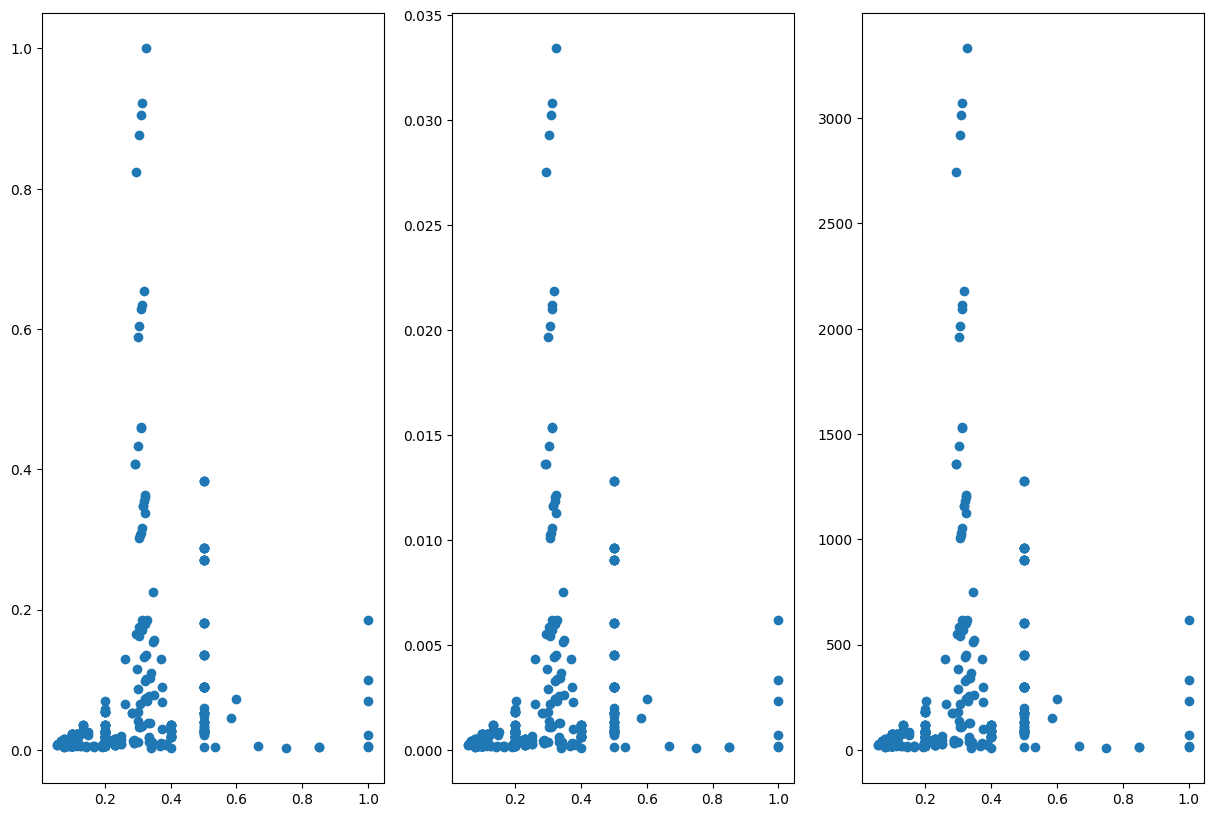

In [120]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
ax1, ax2, ax3 = axs

ax1.scatter(beta, c_values_normed_max)
ax2.scatter(beta, c_values_normed_sum)
ax3.scatter(beta, c_values)

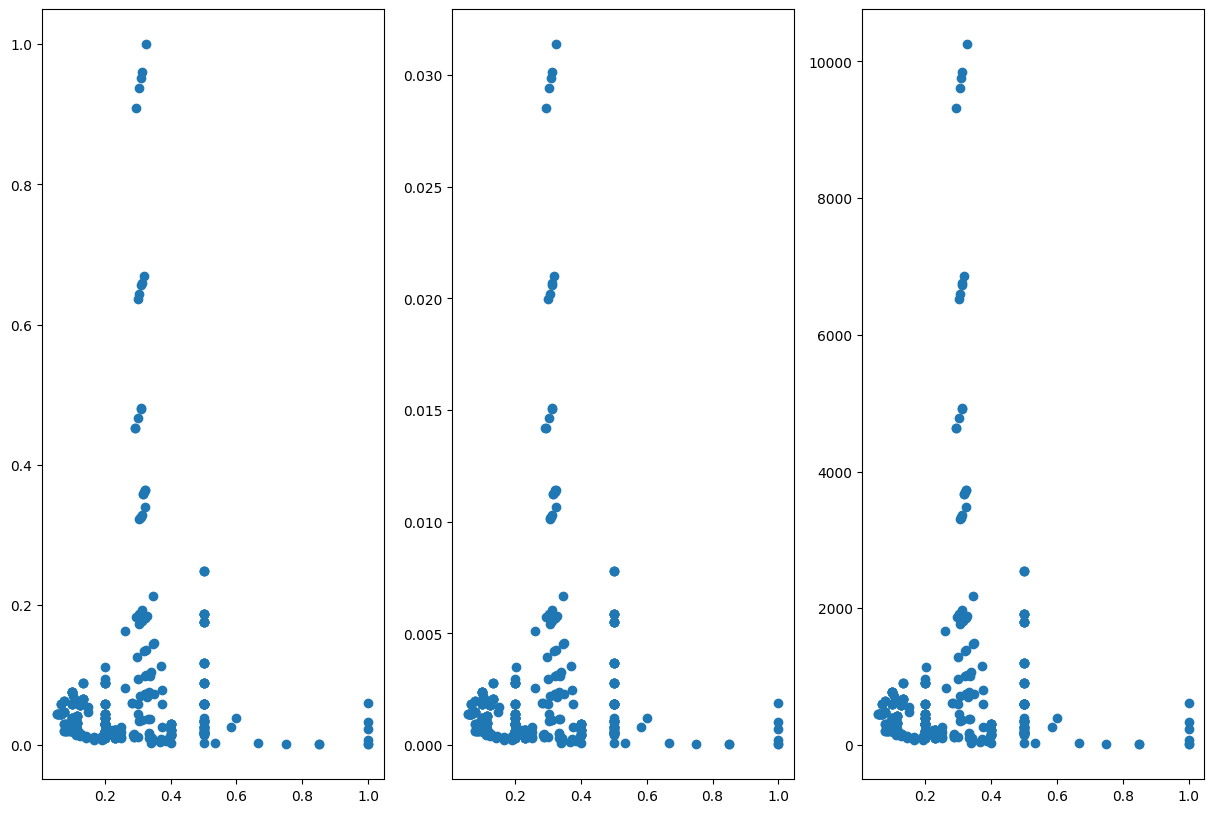

In [119]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
ax1, ax2, ax3 = axs

ax1.scatter(beta, dissimilarity_normed_max)
ax2.scatter(beta, dissimilarity_normed_sum)
ax3.scatter(beta, approx_max_dissimilarity)

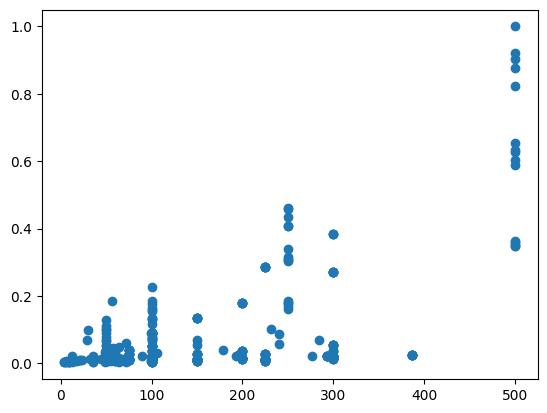

In [121]:
plt.scatter(n_operations, c_values_normed_max)